In [1]:
# Import storiks.plot
import storiks.plot as plot

# Load default options
options = plot.Options()

## 1. Steady State Performance

* Device: Samsung 980 PRO 250
* Filesystem: ext4
* Kernel: 5.11

YCSB workloads A and B

In [7]:
# Load steady-state experiment files (exp_01*)
af1 = plot.AllFiles(
    'exp_01',
    options,
    plot.getFiles('.', str_filter='exp_01'))
af1.print_files()

File Name                      : Label
--------------------------------------------------
./exp_01-ycsb_workloada.out.xz : YCSB A
./exp_01-ycsb_workloadb.out.xz : YCSB B


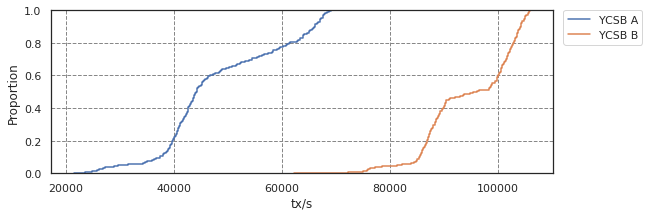

In [8]:
# Plot the CDF of the database performance
af1.graph_ecdf()

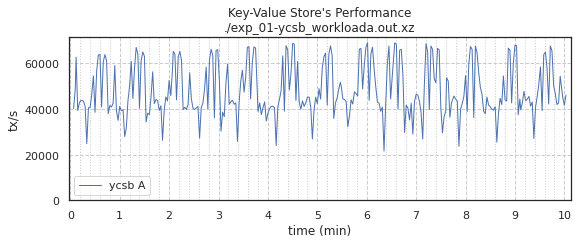

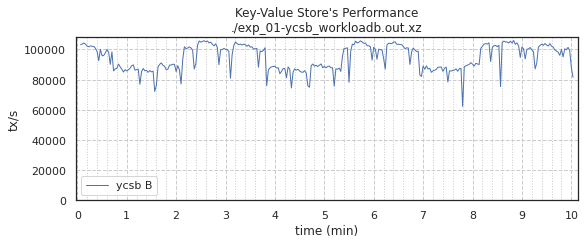

In [9]:
# Database telemetry
for f in af1: f.graph_db()

## 2. Pressure Scale (iodepth)

* For each YCSB workload X in (A, B):
    * For write ratio (wr) from 0 to 1:
        * 1 YCSB workload X
        * 1 access_time3 with the specified wr increasing iodepth from 1 to 64 (d1 to d64).
          *(random ratio (rr) is 1 for all experiments)*

In [10]:
af2 = plot.AllFiles(
    'exp_02',
    options(w_labels=['d0', 'd1']+[f'd{i}' for i in range(2,66,2)]),
    plot.getFiles('.', str_filter='exp_02'))
af2.print_files()

File Name                                                       : Label
-----------------------------------------------------------------------------------
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr000.out.xz : YCSB A + iodepth wr0.0
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr010.out.xz : YCSB A + iodepth wr0.1
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr020.out.xz : YCSB A + iodepth wr0.2
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr050.out.xz : YCSB A + iodepth wr0.5
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr070.out.xz : YCSB A + iodepth wr0.7
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr090.out.xz : YCSB A + iodepth wr0.9
./exp_02-ycsb_workloada-pressure_iodepth_n1bs4rr100wr100.out.xz : YCSB A + iodepth wr1.0
./exp_02-ycsb_workloadb-pressure_iodepth_n1bs4rr100wr000.out.xz : YCSB B + iodepth wr0.0
./exp_02-ycsb_workloadb-pressure_iodepth_n1bs4rr100wr010.out.xz : YCSB B + iodepth wr0.1
./exp_02-ycsb_workloadb-pressure_iodepth_n1

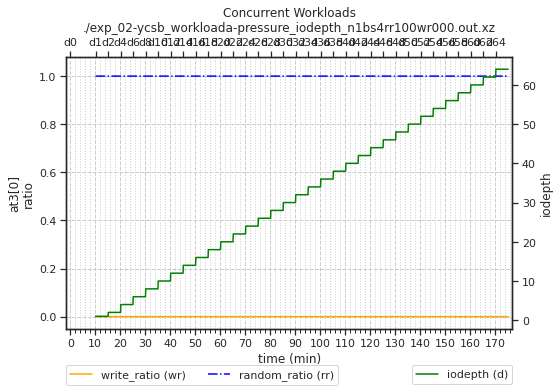

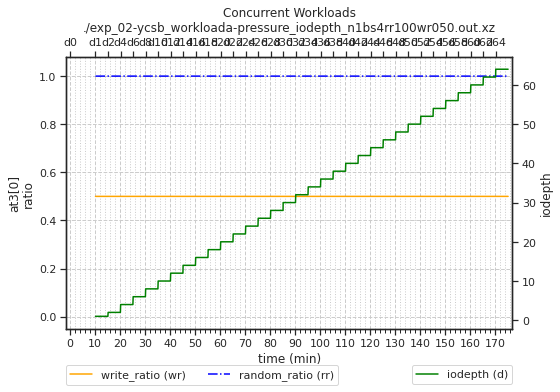

In [14]:
# Example of access_time3 concurrent workloads with wr=0 and 0.5
af2[0].graph_at3_script()
af2[3].graph_at3_script()

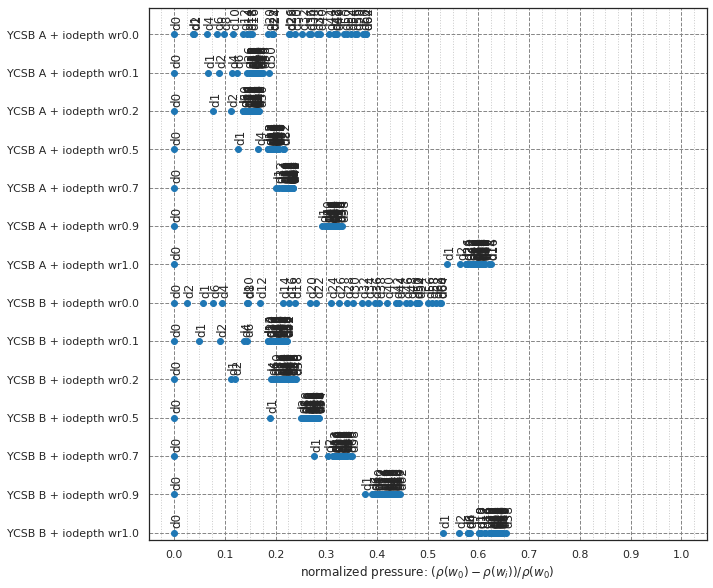

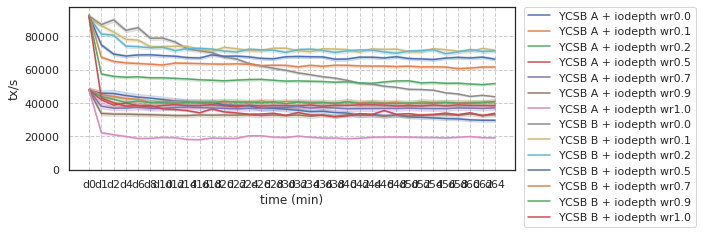

In [15]:
af2.graph_pressure()
af2.graph_dbmean()

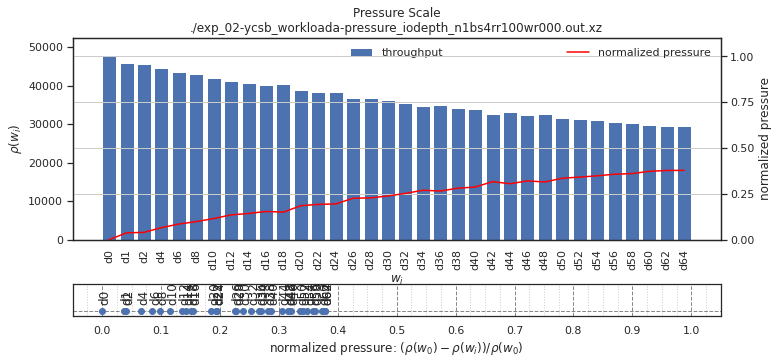

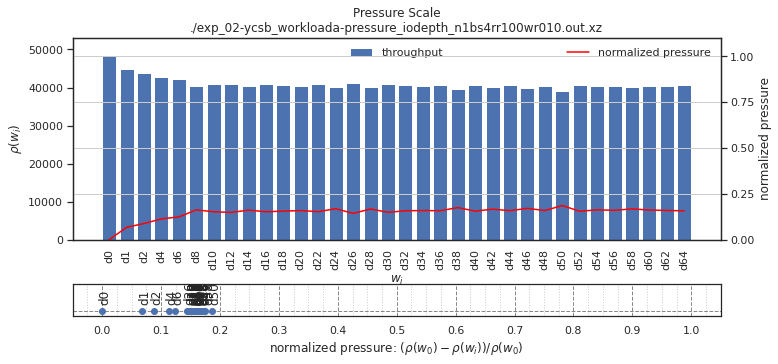

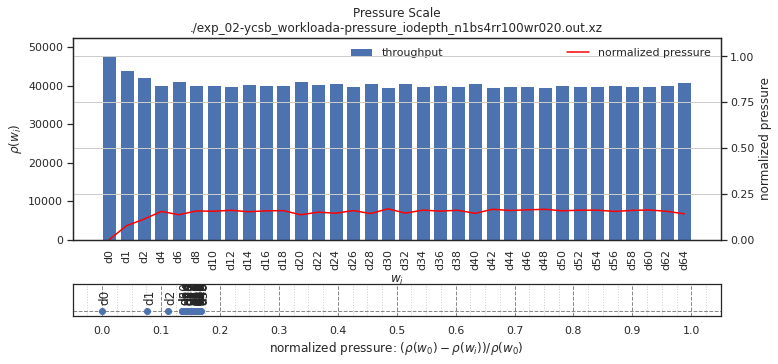

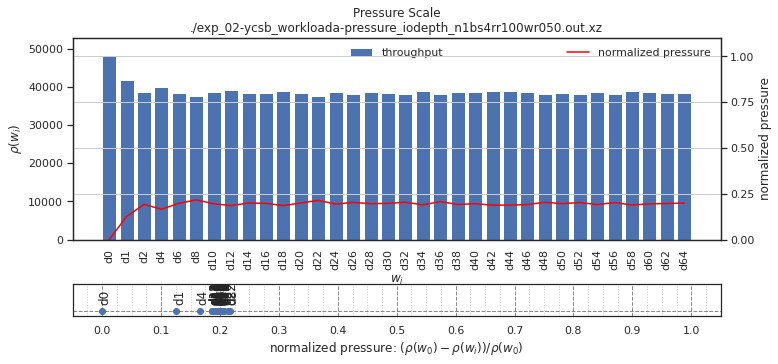

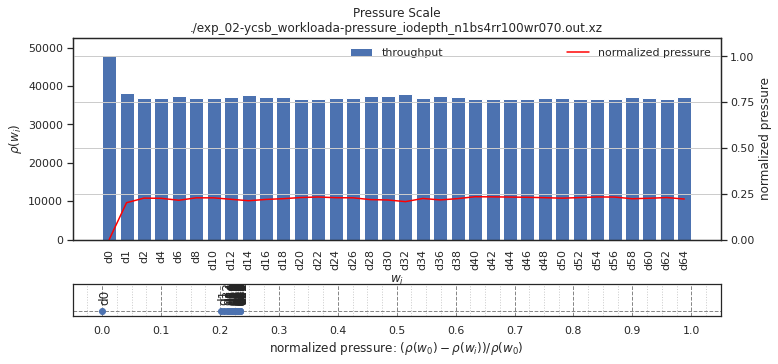

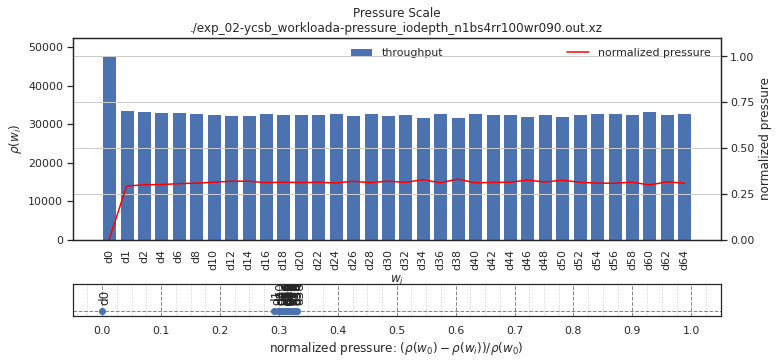

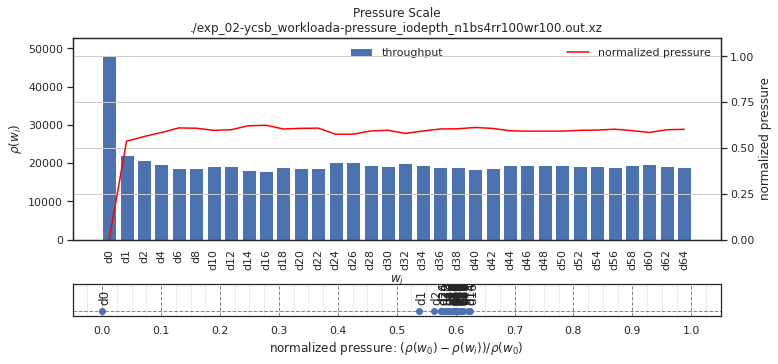

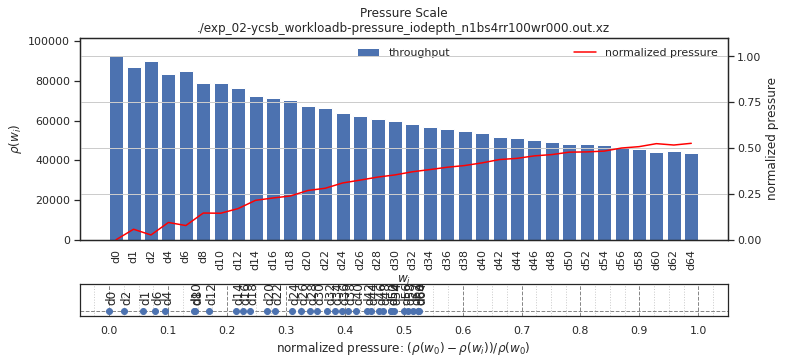

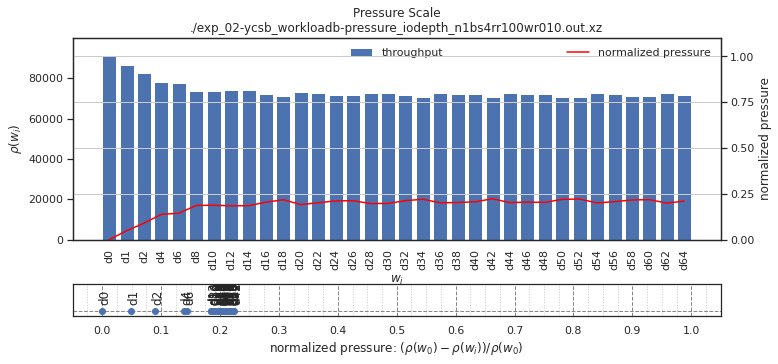

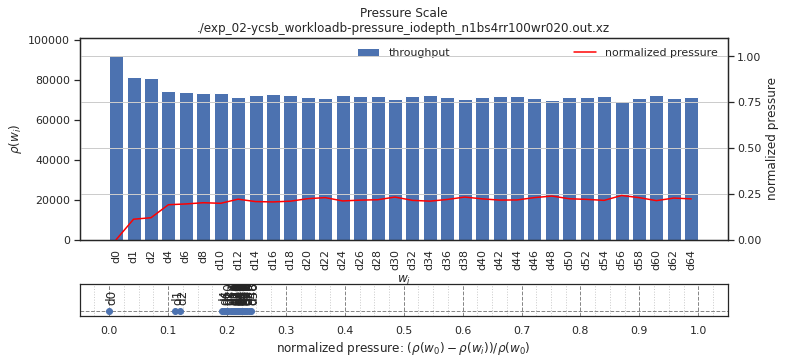

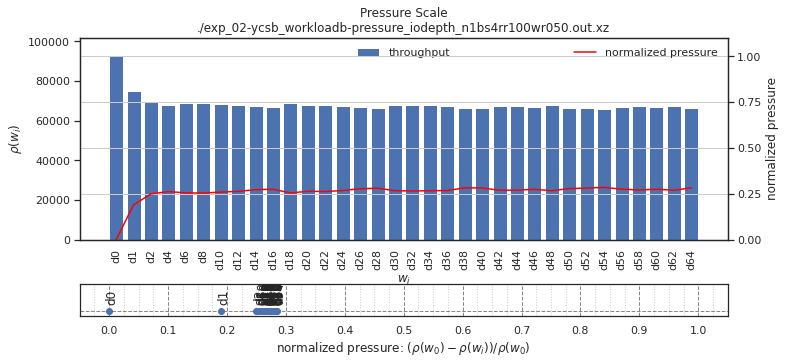

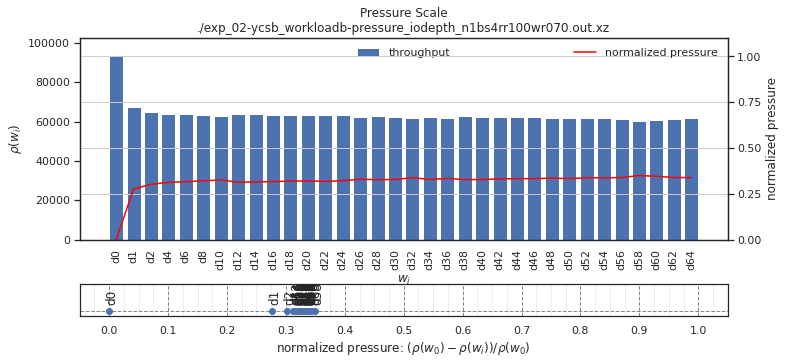

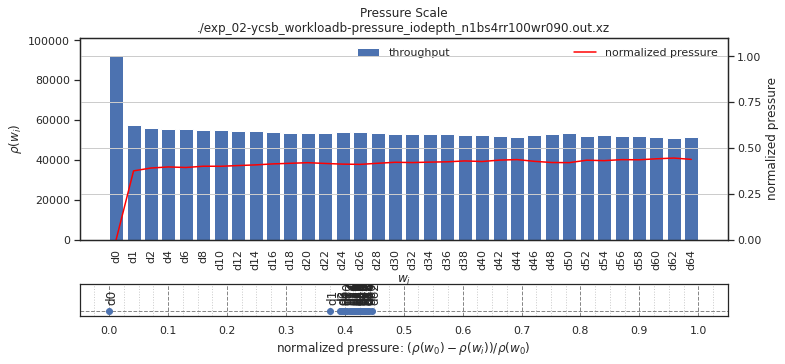

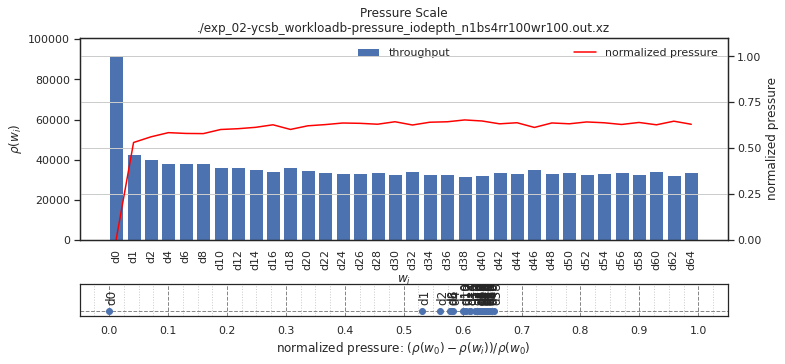

In [16]:
# for f in af2: f.graph_db()
for f in af2: f.graph_pressure()
# for f in af2: f.graph_cpu()
# for f in af2: f.graph_io()
# for f in af2: f.graph_db_summary()

## 3. Access_time3 Executed Alone

In [18]:
af3 = plot.AllFiles(
    'exp_03',
    options(w_labels=['d1']+[f'd{i}' for i in range(2,66,2)]),
    plot.getFiles('', str_filter='exp_03'))
af3.print_files()

File Name                             : Label
---------------------------------------------------------
./exp_03-iodepth_bs4rr100wr000.out.xz : exp_03-iodepth_bs4rr100wr000
./exp_03-iodepth_bs4rr100wr010.out.xz : exp_03-iodepth_bs4rr100wr010
./exp_03-iodepth_bs4rr100wr020.out.xz : exp_03-iodepth_bs4rr100wr020
./exp_03-iodepth_bs4rr100wr050.out.xz : exp_03-iodepth_bs4rr100wr050
./exp_03-iodepth_bs4rr100wr070.out.xz : exp_03-iodepth_bs4rr100wr070
./exp_03-iodepth_bs4rr100wr090.out.xz : exp_03-iodepth_bs4rr100wr090
./exp_03-iodepth_bs4rr100wr100.out.xz : exp_03-iodepth_bs4rr100wr100


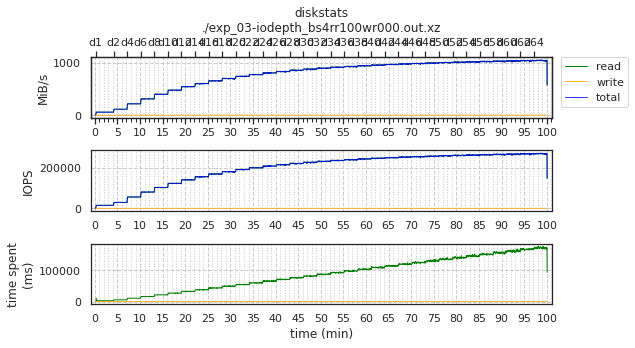

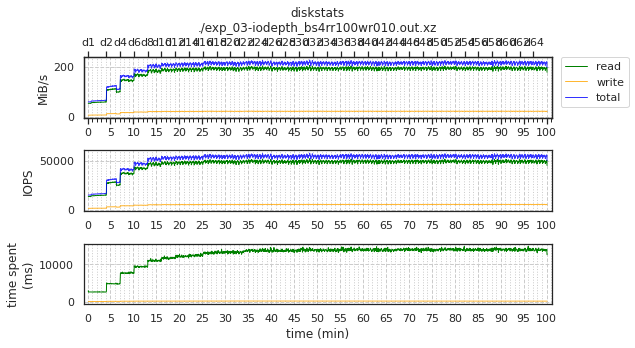

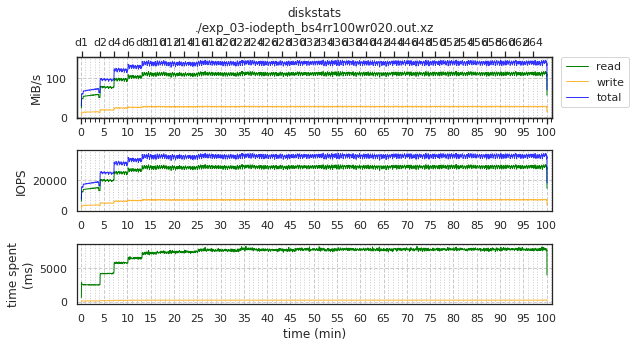

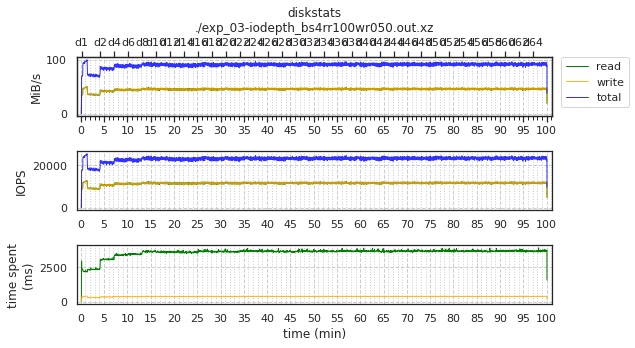

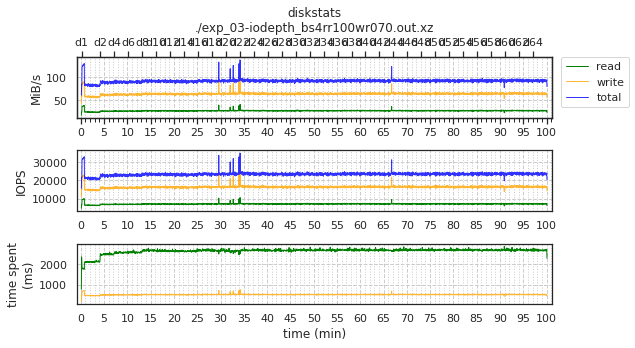

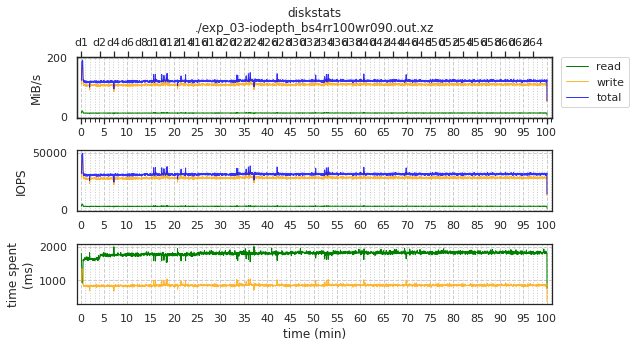

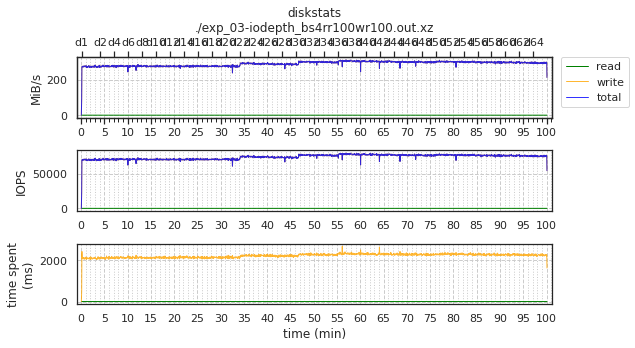

In [19]:
for f in af3: f.graph_io()
# for f in af3: f.graph_cpu()

## 4. Comparing the Pressure Suffered by the KV-Store with the Pressure Suffered by the Access_Time3

In [20]:
import re
for f in af2:
    r = re.findall(r'iodepth_n1([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af3:
            r2 = re.findall(r'iodepth_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

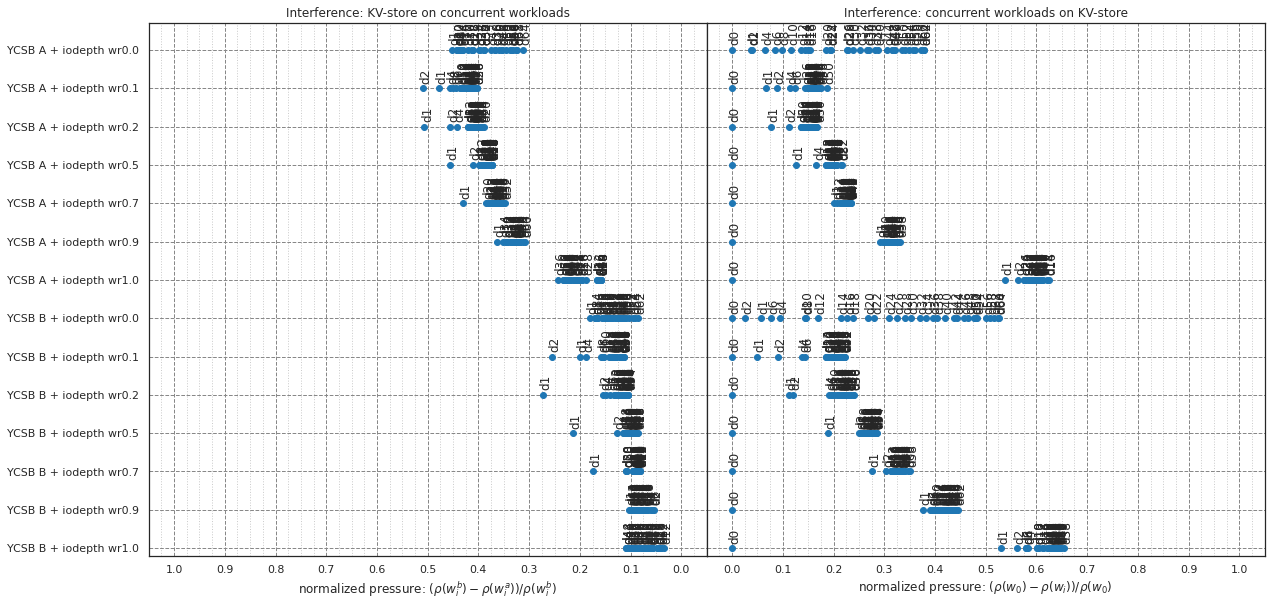

In [21]:
af2.graph_join_pressure()